<h1><center>Practice 1</center></h1>
<h2><center>Error Calculation</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data Set

In [2]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/Nasdaq.csv")

print(f"Total instances: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")

print(data)

Total instances: 126
Total features: 6
           Date Close/Last    Volume     Open      High      Low
0    12/02/2022    $105.05   7916878  $102.02   $105.54  $101.82
1    12/01/2022    $103.37   7452313  $102.33   $103.56  $101.95
2    11/30/2022     $102.2  15000770   $99.05   $102.56   $98.52
3    11/29/2022     $98.66   4423921   $98.96    $99.33    $98.2
4    11/28/2022     $98.66   5257862   $98.99   $100.16   $98.56
..          ...        ...       ...      ...       ...      ...
121  06/10/2022     $75.67   8695476   $77.02    $77.79   $75.66
122  06/09/2022     $78.91  13248100   $77.97    $80.27   $77.73
123  06/08/2022     $78.47   5178253    $78.9  $79.7698   $78.26
124  06/07/2022     $79.47   5517101   $78.57    $79.75   $78.26
125  06/06/2022     $78.98   7239429    $79.7  $81.2999   $78.53

[126 rows x 6 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        126 non-null    object
 1   Close/Last  126 non-null    object
 2   Volume      126 non-null    int64 
 3   Open        126 non-null    object
 4   High        126 non-null    object
 5   Low         126 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


# Clean our dataset from unnecesary symbols

In [4]:
# Remove '$' symbol from our dataset and convert to float

data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
data['Open'] = data['Open'].str.replace('$', '').astype(float)
data['High'] = data['High'].str.replace('$', '').astype(float)
data['Low'] = data['Low'].str.replace('$', '').astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        126 non-null    object 
 1   Close/Last  126 non-null    float64
 2   Volume      126 non-null    int64  
 3   Open        126 non-null    float64
 4   High        126 non-null    float64
 5   Low         126 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ KB


/tmp/ipykernel_11160/2914897821.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
/tmp/ipykernel_11160/2914897821.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Open'] = data['Open'].str.replace('$', '').astype(float)
/tmp/ipykernel_11160/2914897821.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['High'] = data['High'].str.replace('$', '').astype(float)
/tmp/ipykernel_11160/2914897821.py:6: FutureWarning: The default value of

In [5]:
print(data)

           Date  Close/Last    Volume    Open      High     Low
0    12/02/2022      105.05   7916878  102.02  105.5400  101.82
1    12/01/2022      103.37   7452313  102.33  103.5600  101.95
2    11/30/2022      102.20  15000770   99.05  102.5600   98.52
3    11/29/2022       98.66   4423921   98.96   99.3300   98.20
4    11/28/2022       98.66   5257862   98.99  100.1600   98.56
..          ...         ...       ...     ...       ...     ...
121  06/10/2022       75.67   8695476   77.02   77.7900   75.66
122  06/09/2022       78.91  13248100   77.97   80.2700   77.73
123  06/08/2022       78.47   5178253   78.90   79.7698   78.26
124  06/07/2022       79.47   5517101   78.57   79.7500   78.26
125  06/06/2022       78.98   7239429   79.70   81.2999   78.53

[126 rows x 6 columns]


# Polynomial Regresion

In [6]:
degree = 2
X = data["Close/Last"].values.reshape(-1, 1)
y = data["High"]

In [7]:
X_poly = np.column_stack([X ** i for i in range(degree + 1)])

In [8]:
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

y_pred = X_poly @ coefficients

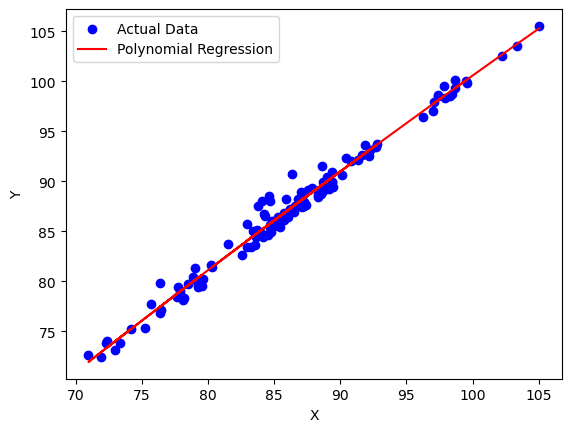

In [9]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<h1><center>Error Calculation</center></h1>

# Data

In [10]:
real_values = data["Close/Last"]
predict_values = y_pred

# Mean Squared Error (MSE)

In [11]:
squared_errors = [(real - pred) ** 2 for real, pred in zip(real_values, predict_values)]
mse = sum(squared_errors) / len(real_values)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.0576400104836616


# Mean Absolute Error (MAE)

In [12]:
n = len(real_values)
mae = sum(abs(real - pred) for real, pred in zip(real_values, predict_values)) / n

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.0152198414908933


# Determination Coeficient (R²)

In [13]:
media_real_values = real_values.mean()
tss = ((real_values - media_real_values) ** 2).sum()
sse = ((real_values - predict_values) ** 2).sum()
r_cuadrado = 1 - (sse / tss)

print(f"Determination Coeficient: {r_cuadrado}")

Determination Coeficient: 0.9781858515769403
